In [3]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [17]:
# define variables, lists
# years of data for analysis
year_list = ['2015', '2016', '2017', '2018', '2019', '2022']

# project happiness survey categories
categories = ['Happiness Score', 'Family', 'Health', 'Freedom', 'Perceptions of Corruption', 'Generosity']
#categories = ['Happiness Score', 'Family', 'Health']
## assumption - complete happiness is an overall score of 10 with 1/5 or 2 points being the ideal for each category

In [5]:
# Load csv files containing the data from the Happiness Surveys for the years 2015 through 2019 and 2022
clean_data_df = pd.read_csv('Output_data/Happiness_df.csv')

clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [6]:
# Select country for column, append data later
country_data_df = pd.DataFrame(clean_data_df[['Country']])

country_data_df

,Country
0,Switzerland
1,Iceland
2,Denmark
3,Norway
4,Canada
...,...
111,Ivory Coast
112,Burkina Faso
113,Afghanistan
114,Benin


In [40]:
# Select country and corresponsing Health columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)',
                                            'Happiness Score (2022)',
                                             ]])

# display only the columns pertaining to health
happy_data_df

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019),Happiness Score (2022)
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.512
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.557
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.636
3,Norway,7.522,7.498,7.537,7.594,7.554,7.365
4,Canada,7.427,7.404,7.316,7.328,7.278,7.025
...,...,...,...,...,...,...,...
111,Ivory Coast,3.655,3.916,4.180,4.671,4.944,5.235
112,Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.670
113,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.404
114,Benin,3.340,3.484,3.657,4.141,4.883,4.623


In [11]:
# define loop variables
loop_category = categories[0]
#top_category = 

## for the year testing
test_year = year_list[1]
## create the column for testing
col = f'{loop_category} ({test_year})'
## create the column for testing
#top_col = f'{top_category} ({test_year})' 

(f"output_data/{col}.png")

'output_data/Happiness Score (2016).png'

In [15]:
# c = 1
# i = 0
# ## for the year testing
# test_year = year_list[i]
# ## create the column for testing
# col = f'{loop_category} ({test_year})'
# ## create the column for testing
# top_col = f'{top_category} ({test_year})'

# loop_category = categories[c] # Category Happiness Score
# #top_category = categories[0]  # Overall Happiness Score
# test_year, col, top_col, loop_category #, top_category

In [24]:
length = len(categories) - 1
length

5

<IPython.core.display.Javascript object>


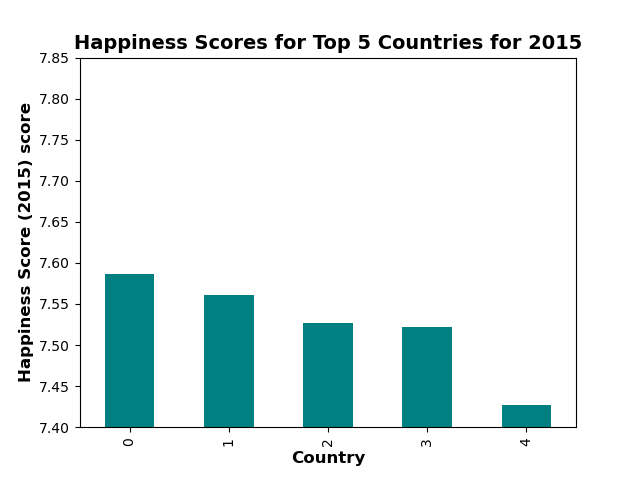

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [58]:
# top 5 happy countries by year
# loop through new DataFrames to make a bar graph of Health Happiness Scores
loop_category = categories[0]  #overall happiness

i = 0  # location criteria test number for y values

for yr in year_list:

    # define loop variables
        ## for the year testing
    test_year = year_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the DataFrame for testing
    score_df = f'{loop_category}{test_year}_df'

    # sort by the category value and create DataFrame for plotting
    happy_data_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
    score_df = pd.DataFrame(happy_data_df_sorted, columns = ['Country',f'{col}'])
    top5_df = score_df.iloc[:5]

    # create bar chart without the x axis tick marks
    top5_df.plot(kind='bar',
                         color='teal',
                         legend=None,
                         title= (f'{loop_category} Happiness Scores for {test_year}')
                         )
    plt.title(f'Happiness Scores for Top 5 Countries for {test_year}', fontsize=14, weight='bold')           
    plt.xlabel('Country', fontsize=12, weight='bold')
    plt.ylabel(f'{col} score', fontsize=12, weight='bold')
    plt.ylim(7.4, 7.85)
    plt.xticks({top5_df['Country']})
   # plt.xticks(axis='x', labels='Country', rotation=45)
    plt.ticks_params(axis='x', which='minor', labelsize=8, rotation=45)
    

    #plt.savefig("Images/Figure1.png")
   # plt.show()

    # and create chart for the next year
    i += 1



In [41]:
# top 5 happy countries by year
# loop through new DataFrames to make a bar graph of Health Happiness Scores
loop_category = categories[0]  #overall happiness

###c = 0  # which criteria the information draws
i = 0  # location criteria test number for y values

# loop for all criteria if desired
###for category in categories:
    # restart criteria for the next year
###i = 0
for yr in year_list:

    # define loop variables
        ## for the year testing
    test_year = year_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the DataFrame for testing
    score_df = f'{loop_category}{test_year}_df'    
        ## name new top 5 DataFrames
    top5 = (f'{loop_category}_{test_year}_top5_df'
            
    # sort by the category value and create DataFrame for plotting
    happy_data_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
    score_df = pd.DataFrame(happy_data_df_sorted, columns = ['Country',f'{col}'])
    top5 = score_df.iloc[:5]

    # create bar chart without the x axis tick marks
    f'{col} top5_df.plot(kind='bar',
                         color='teal',
                         legend=None,
                         title= (f'{loop_category} Happiness Scores for {test_year}')
                         )
    plt.title(f'{loop_category} Scores for {test_year}', fontsize=18, weight='bold')           
    plt.xlabel(f'{Country', fontsize=14, weight='bold')
    plt.ylabel(f'{col} score', fontsize=14, weight='bold')
    plt.grid(color='gray', linestyle='-', linewidth=0.2)

    # simply analyzing the shape of the graph, don't need country name just yet
   #plt.tick_params(axis='x', labelsize=0, length = 0)

    #plt.savefig("Images/Figure1.png")
   # plt.show()

    # and create chart for the next year
    i += 1

# next criteria to create charts if desired
###c +=1

SyntaxError: invalid syntax (751934158.py, line 25)